# Domestic Competitors and Seasonality in the Film Industry

### Objective:

Have a better understanding of the historical performance of the domestic (USA) movie industry.

1) Which studios are the domestic leaders? 

2) What are their production numbers? 

3) What types of movies are they making?

4) Is release date correlated with a film's success at the box office?




### Introduction

Begin by importing necessary libraries and declaring two functions for later use.

In [5]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import calendar
import numpy as np
import seaborn as sns

%matplotlib inline

mil = 1000000
bil = 1000000000

In [6]:
def pull_studio_df(str):
    '''Takes in a studio name abbreviation as a 'string' and returns the studio specific 
    Data Frame from the studio.csv master Data Frame.''' 
    if str in list(studio.studio.unique()):
        df = studio.loc[studio['studio'] == str]
        df_grouped = df.groupby('year').agg({'domestic_gross': 'sum', 'title': 'count'})
        df_grouped['domestic_gross_mil'] = df_grouped['domestic_gross']/mil
        df_grouped.drop('domestic_gross', inplace=True, axis=1)
        return df_grouped
    else:
        return "Could not make Data Frame. Input not found in studio abbrev. list."
    
    
def get_studio_genres(str):
    '''Takes in a studio name as a 'string' and returns a Data Frame with columns for each 'genre' transposed 
    into the index rows. The values column is a custom labeled 'count' of how often the studio labeled their 
    movies as that genre. The last of the total count of genre labels.'''
    if str in list(studio_genres.index):
        df = studio_genres.loc[studio_genres.index == str].transpose().reset_index()
        df.drop(df.tail(1).index,inplace=True)
        df.columns = ['genre', '{}_count'.format(str.strip(".").lower())]
        return df
    else:
        return "Could not make Data Frame. Input not found in studio abbrv. list."



I began by scrubbing a data set from IMDB that now contains movie title, studio information, domestic gross in USD, and release year. The data spans 9 years from 2010 - 2018. There are 257 unique studios, globally, in the set. There is data for 3,387 movie unique movies titles.

In [7]:
studio = pd.read_csv('./CleanData/studio.csv')
studio.drop('Unnamed: 0', axis = 1, inplace = True)
studio.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


I chose to focus on domestic finance as 39.9% of the records lacked a foreign gross revenue total. For the entirity of this analysis, if finances are mentioned, they are in terms of domestic data. I grouped by studio and year to get a sense of studio productivity. We can now explore the highest grossing studios as well as the highest producing (in terms of number of titles released).

Lets take a look at the top 10 grossing studios which have produced 1,268 movies across the span of the data set, or 37.4 percent of the content. They have a combined gross of $82,460,285,390.00 USD, which is 85.4 percent of total recorded gross. This is going to be a very competive industry. Let's investigate how our potential competitors measure up.

In [8]:
studio_prod = studio.groupby('studio').agg({'domestic_gross': 'sum', 'title': 'count'}).sort_values(by='title',ascending=False)
studio_prod['domestic_gross'] = studio_prod['domestic_gross'] / mil
studio_prod.columns = ['dom_gross_mil', 'title_count']

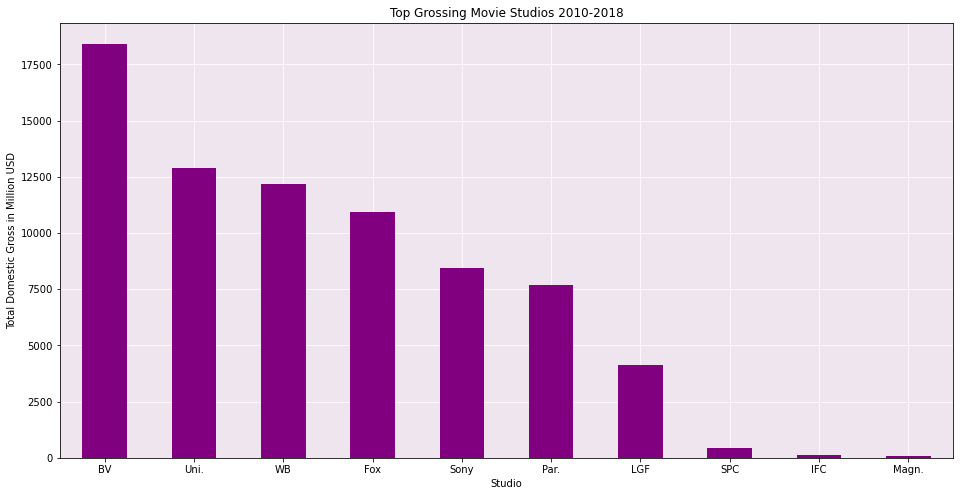

In [9]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(16,8))
studio_prod.dom_gross_mil.head(10).sort_values(ascending=False).plot.bar(color='purple', zorder=3);
plt.xticks(rotation=0)
plt.title('Top Grossing Movie Studios 2010-2018')
plt.xlabel('Studio')
plt.ylabel('Total Domestic Gross in Million USD')
ax.set_facecolor('thistle')
ax.patch.set_alpha(0.4)
ax.grid(color='white', zorder=0)
plt.show()

### 1) Who are the domestic leaders?

Shown above, the top 10 studios are Buena Vista (Disney), Universal Studios, Warner Brothers, Fox, Sony, Paramount, Lionsgate, Sony Pictures Classic, IFC (Independent Film Channel), and Magnolia Pictures. These popular studios are likely some of the companies you think of when consider the movie industry. They are also some of the longest running and most established. It makes sense that there would begin a drop off (though we are still in the billions of dollars range) after these studios. As they are highest grossing, they also must spend the most for marketing, talent, and cutting edge technologies. We will examine their relationship to profit later in this notebook.

In [10]:
studio_sum = studio.groupby('studio').agg({'domestic_gross': 'sum', 'title': 'count', 'year': 'nunique'})
studio_sum['dom_gross_mil'] = studio_sum['domestic_gross'] / mil
studio_sum['dom_gross_bil'] = studio_sum['domestic_gross'] / bil
studio_sum = studio_sum[['domestic_gross', 'dom_gross_mil', 'dom_gross_bil', 'title', 'year']]

I build out a table to show each of the top studio's gross in different terms, as well as number of titles produced. 'Year' represents count of years they had a movie release.

In [11]:
studio_sum.sort_values(by='dom_gross_mil', ascending=False).head(10)

,domestic_gross,dom_gross_mil,dom_gross_bil,title,year
studio,,,,,
BV,1.841903e+10,18419.029199,18.419029,106,9
Uni.,1.290239e+10,12902.393000,12.902393,147,9
WB,1.216805e+10,12168.046000,12.168046,140,9
Fox,1.094950e+10,10949.499997,10.949500,136,9
Sony,8.459683e+09,8459.683098,8.459683,110,9
Par.,7.685871e+09,7685.870699,7.685871,101,9
LGF,4.118963e+09,4118.963400,4.118963,103,9
WB (NL),3.995700e+09,3995.699999,3.995700,45,9
LG/S,2.078200e+09,2078.199998,2.078200,41,7


Let's investigate the top four domestic grossing studios for production count. The top four studios are Beauna Vista (Disney), Universal Studios, Warner Brothers, Fox. These producers all have a total gross above $10 billion. Is their production rate steady? Does their business perform in waves? Calling on a function I defined above, I create a studio specific data frame for each of the top four studios. These snapshots show the number of titles produced and the gross revenue in million USD per year active. I plotted these summaries to allow for easy comparision.

In [12]:
bv_gr = pull_studio_df('BV')
uni_gr = pull_studio_df('Uni.')
wb_gr = pull_studio_df('WB')
fox_gr = pull_studio_df('Fox')
fox_gr.head(4) # example display

,title,domestic_gross_mil
year,,
2010,17,964.600000
2011,15,1017.200000
2012,15,1020.299999
2013,14,1022.300000


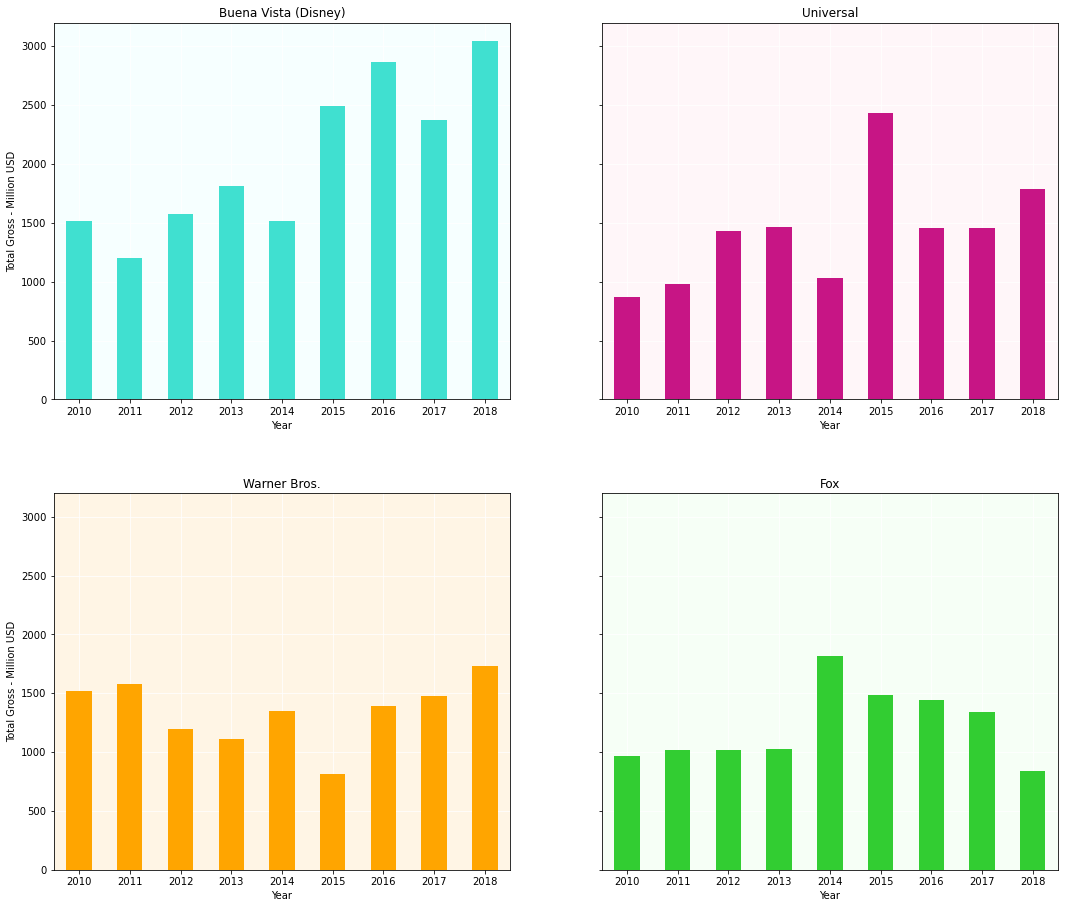

In [13]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, sharey=True, figsize=(18,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.25, wspace=0.2)

ax00=axes[0][0]
bv_gr.domestic_gross_mil.plot(kind='bar', ax=ax00, color='turquoise', zorder=3);
ax00.set_title('Buena Vista (Disney)')
ax00.set_xlabel('Year')
ax00.set_ylabel('Total Gross - Million USD')
ax00.set_xticklabels(ax00.get_xticklabels(), rotation=0)
ax00.set_facecolor('azure')
ax00.patch.set_alpha(0.6)
ax00.grid(color='white', zorder=0)

ax01=axes[0][1]
uni_gr.domestic_gross_mil.plot(kind='bar', ax=ax01, color='mediumvioletred', zorder=3);
ax01.set_title('Universal')
ax01.set_xlabel('Year')
ax01.set_ylabel('Total Gross - Million USD')
ax01.set_xticklabels(ax01.get_xticklabels(), rotation=0)
ax01.set_facecolor('lavenderblush')
ax01.patch.set_alpha(0.6)
ax01.grid(color='white', zorder=0)

ax10=axes[1][0]
wb_gr.domestic_gross_mil.plot(kind='bar', ax=ax10, color='orange', zorder=3);
ax10.set_title('Warner Bros.')
ax10.set_xlabel('Year')
ax10.set_ylabel('Total Gross - Million USD')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=0)
ax10.set_facecolor('papayawhip')
ax10.patch.set_alpha(0.6)
ax10.grid(color='white', zorder=0)

ax11=axes[1][1]
fox_gr.domestic_gross_mil.plot(kind='bar', ax=ax11, color='limegreen', zorder=3);
ax11.set_title('Fox')
ax11.set_xlabel('Year')
ax11.set_ylabel('Total Gross - Million USD')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=0)
ax11.set_facecolor('honeydew')
ax11.patch.set_alpha(0.6)
ax11.grid(color='white', zorder=0)
plt.show()

Beauna Vista and Universial indicate a potential upward trend in revenue. In recent years Disney has aquired the Star Wars and Marvel franchises. Huge fanbases for both. It is worth future investigation if known characters and storylines (such as from books/comics, remakes, or television to screen) that have an establisheed fanbase create greater draw at the box office. Or are people craving fresh perspectives and experiences they have not seen before?

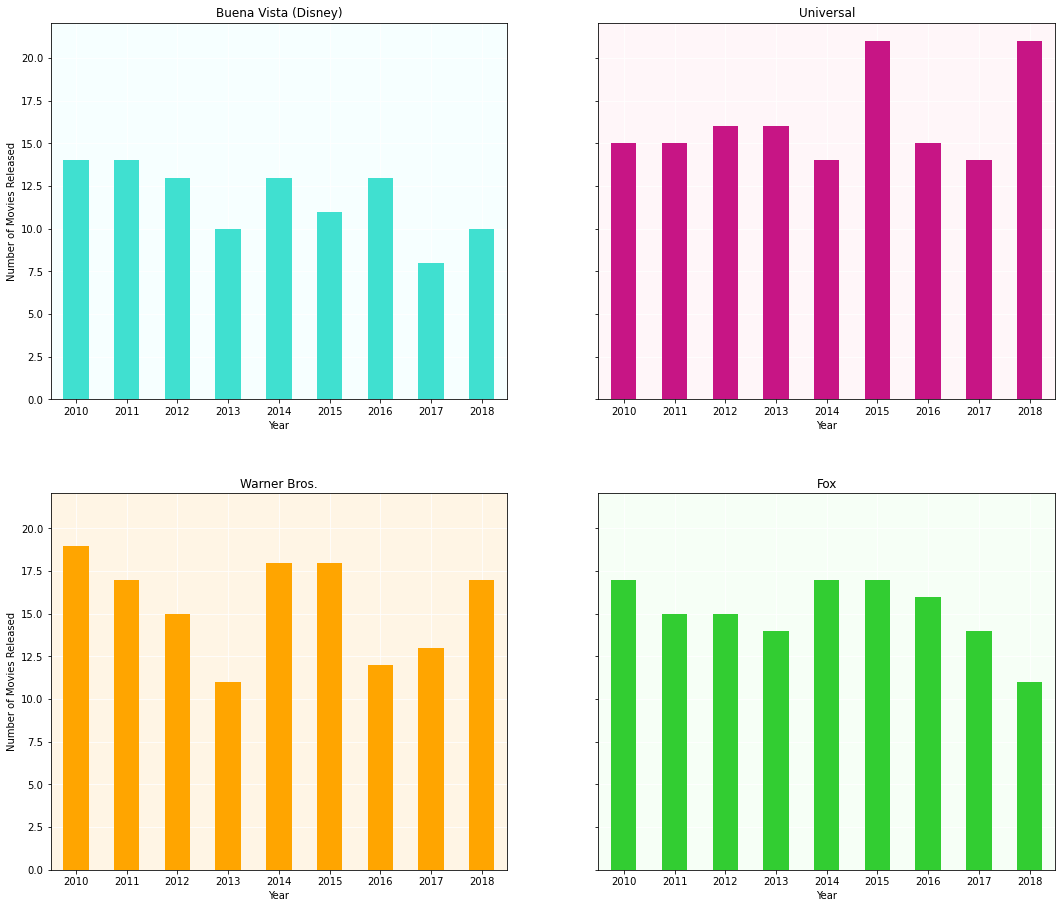

In [14]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, sharey=True, figsize=(18,12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=.25, wspace=0.2)
ax00=axes[0][0]
bv_gr.title.plot(kind='bar', ax=ax00, color='turquoise', zorder=3);
ax00.set_title('Buena Vista (Disney)')
ax00.set_xlabel('Year')
ax00.set_ylabel('Number of Movies Released')
ax00.set_xticklabels(ax00.get_xticklabels(), rotation=0)
ax00.set_facecolor('azure')
ax00.patch.set_alpha(0.6)
ax00.grid(color='white', zorder=0)

ax01=axes[0][1]
uni_gr.title.plot(kind='bar', ax=ax01, color='mediumvioletred', zorder=3);
ax01.set_title('Universal')
ax01.set_xlabel('Year')
ax01.set_ylabel('Number of Movies Released')
ax01.set_xticklabels(ax01.get_xticklabels(), rotation=0)
ax01.set_facecolor('lavenderblush')
ax01.patch.set_alpha(0.6)
ax01.grid(color='white', zorder=0)

ax10=axes[1][0]
wb_gr.title.plot(kind='bar', ax=ax10, color='orange', zorder=3);
ax10.set_title('Warner Bros.')
ax10.set_xlabel('Year')
ax10.set_ylabel('Number of Movies Released')
ax10.set_xticklabels(ax10.get_xticklabels(), rotation=0)
ax10.set_facecolor('papayawhip')
ax10.patch.set_alpha(0.6)
ax10.grid(color='white', zorder=0)

ax11=axes[1][1]
fox_gr.title.plot(kind='bar', ax=ax11, color='limegreen', zorder=3);
ax11.set_title('Fox')
ax11.set_xlabel('Year')
ax11.set_ylabel('Number of Movies Released')
ax11.set_xticklabels(ax11.get_xticklabels(), rotation=0)
ax11.set_facecolor('honeydew')
ax11.patch.set_alpha(0.6)
ax11.grid(color='white', zorder=0)
plt.show()

### 2) What are their production numbers? 

The quantity of movies released per year (as shown in the plots above) stays above 10 films for all studios but Disney (who dipped to 8 films in 2017), with a peak of 21 films in a single year for Universal. It takes their massive networks and budgets to produce at that rate, more than one movie per month in some cases. That is not necesarily the most profitable.

We will dive into release dates in the next notebook, but we can begin to consider whether a constant flow of content keeps a compnay relevant, or if it makes sense to plan releases around certain times of year.

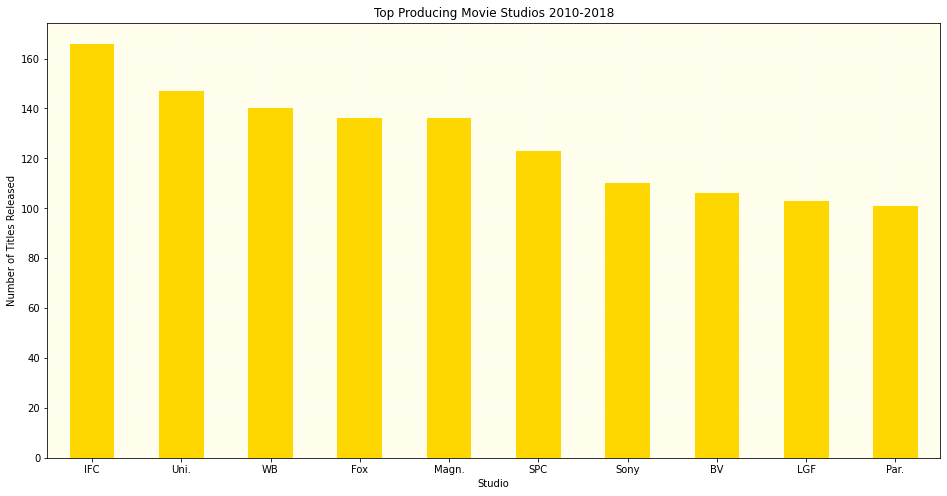

In [15]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(16,8))
studio_prod.title_count.head(10).plot.bar(color='gold', zorder=3);
plt.title('Title Count Across years/??')
plt.xticks(rotation=0)
plt.title('Top Producing Movie Studios 2010-2018')
plt.xlabel('Studio')
plt.ylabel('Number of Titles Released')
ax.set_facecolor('lemonchiffon')
ax.patch.set_alpha(0.4)
ax.grid(color='white', zorder=0)
plt.show()

Let's examine produciton totals across the 9 years of data. We have the same studios as top grossing, howeveer in a different order. Disney has fallen back to 8th in rank and IFC has jumped to first, with 166 unique titles. How is IFC producing so much more content at a fraction of the revenue (though still ttop ten)? Is this a route Microsoft could be interested in pursuing. 

IFC makes smaller independent movies that are much cheaper than the blockbusters the many of the other studios on this list are responsible for. They also produce a number of documentaries. With less branded oversite, filmakers are able to make much more original content. The movies will also have more limited release and less marketing push. IFC still has impressive revenue numbers, let's investigate which types of movies are less popular at the box office but more popular with audiences. Will a reputation as an interesting studio telling less mainstream stories be a preferable direction to competing with the mainstay industry leaders?

In [16]:
per_studio_ratings = pd.read_csv('./CleanData/per_studio_ratings.csv')
per_studio_ratings['sum_dom_gross'] = per_studio_ratings['sum_dom_gross']/bil
per_studio_ratings.loc[per_studio_ratings['studio'].isin(list(studio_prod.title_count.head(10).index))
                      ].sort_values('average_rating', ascending=False)

,studio,title_count,sum_dom_gross,year_count,avg_runtime_min,average_rating,total_votes
209,SPC,123,0.547888,9,102.621849,6.448739,4327904.0
36,BV,106,23.136929,9,99.141509,6.332075,19217339.0
246,WB,140,14.006946,9,106.732283,6.126772,21726881.0
185,Par.,101,8.897377,9,104.125000,6.014583,15392837.0
215,Sony,110,8.874603,9,103.410526,5.809474,11137590.0
113,IFC,166,0.121621,9,96.690909,5.767273,2783647.0
93,Fox,136,12.909300,9,99.013072,5.676471,18514704.0
134,LGF,103,4.589763,9,98.117647,5.562745,8126284.0
148,Magn.,136,0.086503,9,91.115942,5.457971,2527096.0
238,Uni.,147,17.189831,9,95.967033,5.332418,17979643.0


Is IFC making higher reviewed movies? On average, it doesn't seem so. The average falls near the middle for top studios. The ratings are from the Internet Movie Database (IMDB). IMDB states their reviews are already weighted based on review count and proprietary other features. Thus I did not weight the average against total votes.

A quick examination on votet counts - people who choose to go online to rate a movie were moved by the movies in some way that they wanted to share with others. Perhaps taking a look at the most reviews (popular for either good or bad reasons!) to see if any studios show up as being well loved.

Below, we see many familiar players from out top grossing caegory. The last three studios on this list show that We have the addition of The Weinstein Company, New Line Cinema, and Fox Searchlight Pictures. 

In [17]:
per_studio_ratings.sort_values(by='total_votes', ascending=False).head(10)

,studio,title_count,sum_dom_gross,year_count,avg_runtime_min,average_rating,total_votes
246,WB,140,14.006946,9,106.732283,6.126772,21726881.0
36,BV,106,23.136929,9,99.141509,6.332075,19217339.0
93,Fox,136,12.909300,9,99.013072,5.676471,18514704.0
238,Uni.,147,17.189831,9,95.967033,5.332418,17979643.0
185,Par.,101,8.897377,9,104.125000,6.014583,15392837.0
215,Sony,110,8.874603,9,103.410526,5.809474,11137590.0
134,LGF,103,4.589763,9,98.117647,5.562745,8126284.0
251,Wein.,77,1.946982,8,95.989474,5.735789,7079427.0
247,WB (NL),45,5.322100,9,94.092308,5.163077,6387644.0
94,FoxS,67,1.392832,9,95.707865,5.974157,5936854.0


Taking the average of, in some cases, millions of reviews seems to result in mostly normal distribution of ratings, seen below. A slight right skew to the bell shape. The quantile - quantile plot indicates normal distibution when the points fall along a straight line, 45 degrees from the x-axis. The skew is noted in that plot as well.

/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


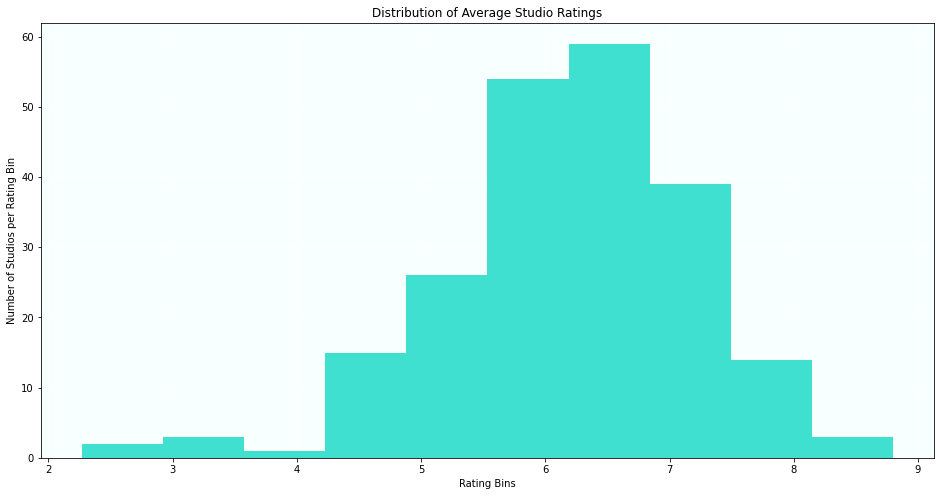

In [18]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(16,8)) 
plt.hist(per_studio_ratings.average_rating, bins=10, color='turquoise', zorder=3);
plt.title('Distribution of Average Studio Ratings')
plt.xticks(rotation=0)
plt.xlabel('Rating Bins')
plt.ylabel('Number of Studios per Rating Bin')
ax.set_facecolor('azure')
ax.patch.set_alpha(0.5)
ax.grid(color='white', zorder=0)
plt.show()

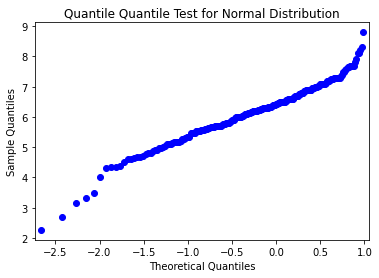

In [19]:
qqplot(per_studio_ratings.average_rating, line='s')
plt.title('Quantile Quantile Test for Normal Distribution')
plt.show() 

Let's examine relationship between ratings and gross without whole studio averages, incase top and bottom outliers merged to create inaccurate mid range listing. Below is a scatter plot of the movie ratings individually compared to domestic gross. I am using domestic gross as a popularity indicator, did people turn out to see this movie? Did they tell other people they must go see this movie? 

In [20]:
studio_ratings = pd.read_csv('./CleanData/studio_ratings.csv')
studio_ratings.drop('Unnamed: 0', axis=1, inplace=True)
studio_ratings.head(3)

,title,studio,domestic_gross,year,runtime_minutes,averagerating,numvotes,runtime_bins,genres_list
0,Toy Story 3,BV,415000000.0,2010,103.0,8.3,682218.0,"(90.0, 120.0]","['Adventure', 'Animation', 'Comedy']"
1,Inception,WB,292600000.0,2010,148.0,8.8,1841066.0,"(120.0, 150.0]","['Action', 'Adventure', 'Sci-Fi']"
2,Shrek Forever After,P/DW,238700000.0,2010,93.0,6.3,167532.0,"(90.0, 120.0]","['Adventure', 'Animation', 'Comedy']"


In [21]:
scat_ratings = studio_ratings[studio_ratings['averagerating']>0] # Remove placeholder values/records without ratings

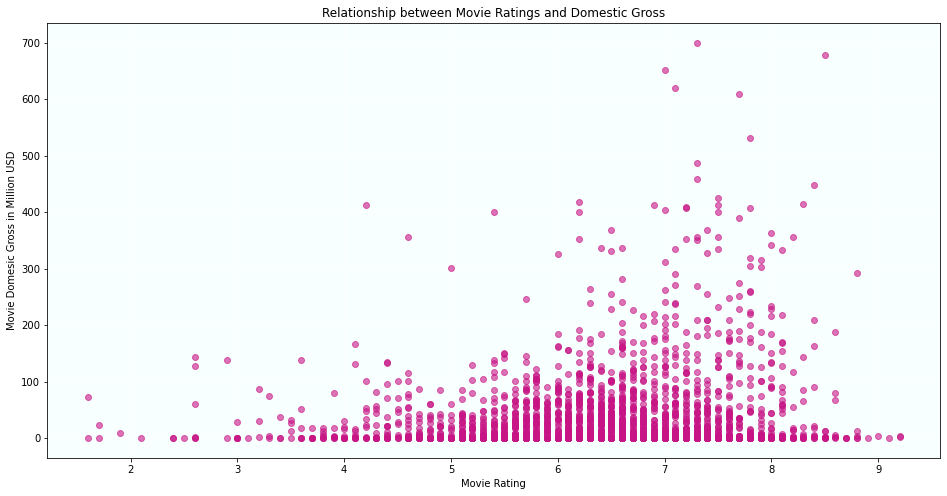

In [22]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(16,8)) 
plt.scatter(scat_ratings['averagerating'], 
            scat_ratings['domestic_gross']/mil, color='mediumvioletred', alpha=0.6, zorder=3)
ax.set_facecolor('lavenderblush')
ax.patch.set_alpha(0.6)
plt.title('Relationship between Movie Ratings and Domestic Gross')
plt.xticks(rotation=0)
plt.xlabel('Movie Rating')
plt.ylabel('Movie Domesic Gross in Million USD')
ax.set_facecolor('azure')
ax.patch.set_alpha(0.5)
ax.grid(color='white', zorder=0)
plt.show()

There does not appear to be a relationship between movie rating as available online and its performance at the box off. Below, this is supported by a very low correlation coefficient.

In [23]:
corr_co = scat_ratings['averagerating'].corr(scat_ratings['domestic_gross']/mil)
corr_co

0.1192996903676651

Let's remove the top 10% of grossing movies which will let us view the relationship of those below 100 million USD in revenue.

In [24]:
outlier = 0.10
bot_scat_ratings = studio_ratings[studio_ratings['averagerating']>0]
top_10 = int(len(studio_ratings) * outlier) - 1 # 338.700, minus 1 to account for 0 index start
bottom = bot_scat_ratings.sort_values('domestic_gross', ascending=False).iloc[top_10:] # Remove top % of grossing movies

As seen by the correlation coefficient and scatter plott below, there is even less of a relationship between revenue and movie rating than will all the data. It seems people are mostly independently chosing which movies to watch and not relying heavily on being directed by reviews. Going by reviews is very biased, not everyone who sees a movie will review it. The actual human behavioral relationship between online reviews and likeliess to see a film is beyond the scope of this data set.

In [25]:
corr_co2 = bottom['averagerating'].corr(bottom['domestic_gross']/mil)
corr_co2

-0.047908893946827166

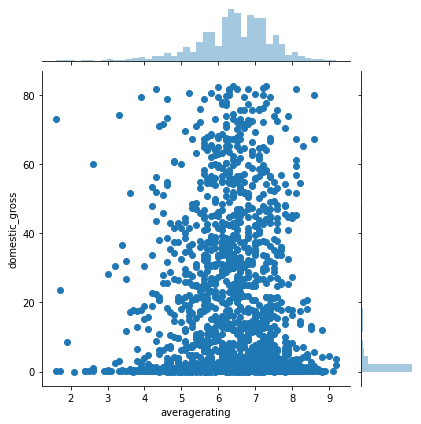

<Figure size 1440x2880 with 0 Axes>

In [26]:
sns.jointplot(x=bottom['averagerating'], y=(bottom['domestic_gross']/mil))
plt.figure(figsize=(20, 40))
plt.show()

### 3) What types of movies are being made?

Let's now examine the genre genres most commonly produced by our familiar top 4 grossing studios: Beauna Vista (Disney), Universal Studios, Warner Brothers, and Fox. Open up a new data frame of all studios and the sums of the genre counts of how often their films are labeled as certain way. Using a function declared at the top of the page, create a pivoted version of just the select 4 studios.

In [27]:
studio_genres = pd.read_csv('./CleanData/studio_genres.csv')
studio_genres.set_index('studio', inplace=True)
studio_genres.head(3)

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Sci-Fi,Short,Sport,Talk-Show,Thriller,Unlisted,War,Western,genre_len,genre_sum
studio,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0,6.0
3D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
A23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0


In [28]:
bv_gen = get_studio_genres('BV').set_index('genre')
bv_gen_plt = bv_gen.drop(bv_gen.tail(1).index)
uni_gen = get_studio_genres('Uni.').set_index('genre')
uni_gen_plt = uni_gen.drop(uni_gen.tail(1).index)
wb_gen = get_studio_genres('WB').set_index('genre')
wb_gen_plt = wb_gen.drop(wb_gen.tail(1).index)
fox_gen = get_studio_genres('Fox').set_index('genre')
fox_gen_plt = fox_gen.drop(fox_gen.tail(1).index)

In [29]:
top_stud_gens = pd.concat([bv_gen_plt, uni_gen_plt, wb_gen_plt, fox_gen_plt], axis=1,)
top_stud_gens.drop(['Adult', 'Talk-Show', 'Short', 'News', 'Reality-TV', 'Game-Show'], axis=0, inplace=True)
top_stud_gens.head(3)

,bv_count,uni_count,wb_count,fox_count
genre,,,,
Action,30.0,56.0,44.0,47.0
Adventure,57.0,35.0,35.0,52.0
Animation,25.0,8.0,5.0,18.0


Plotting these counts as a heat map allows us to observe if any studios focus on certain genres. All four studios favor producing Action, Adventure, and Dramas, and Comedies -  which are the most popular genres overall. We can see though that Warner Bros. and Universial rarely produce animations while that is a large category for Disney and Fox. Universal Seems to have a singular hold on thrillers and an reasonable effort in Thriller, Romance and Horror (but aren't those the same?). 

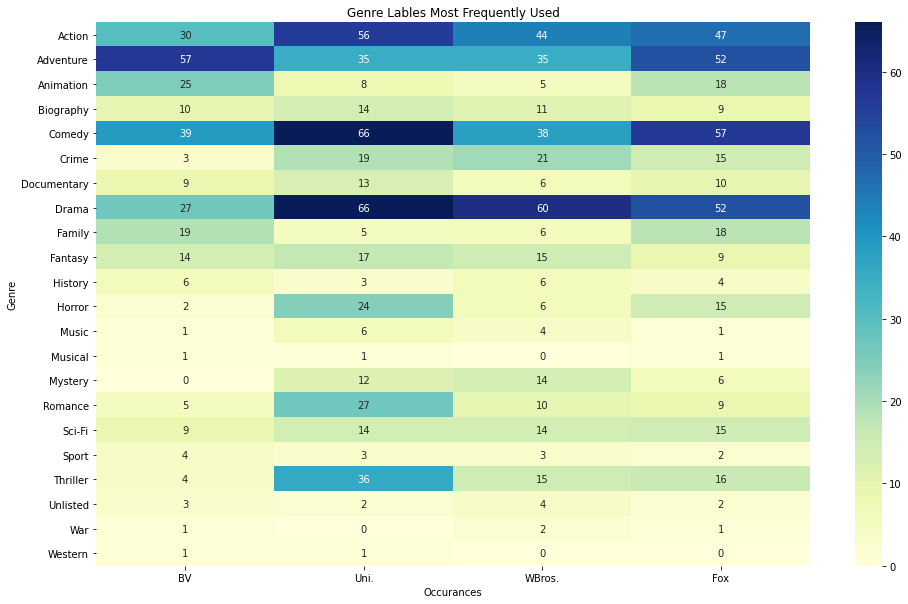

In [30]:
plt.figure(figsize=(16, 10))
sns.heatmap(top_stud_gens, cmap="YlGnBu", annot=True, xticklabels=['BV', 'Uni.', 'WBros.', 'Fox'], fmt='g');
plt.title("Genre Lables Most Frequently Used")
plt.xlabel("Occurances")
plt.ylabel("Genre")
plt.show()

### 4) Is release date correlated with a film's success at the box office?

When people spending at box office? Is continous and staggard best practice or does the time of release effect return on investment (ROI)? This will help Microsoftt decide the time of year to debut content. We will need to import more financial information for this inspection. This data set, also from IMDB, contains movie data spanning from 1915 to 2020, giving a vast historical perspective on movie going trends finance numbers.


In [31]:
dom_money = pd.read_csv('./CleanData/dom_money.csv')
dom_money.drop('Unnamed: 0', axis=1, inplace=True)
dom_money.head(3)

,release_date,year,month,movie,budget,dom_gross,dom_profit,dom_profit_mil,dom_profit_margin,dom_ROI%
0,2009-12-18,2009,12,Avatar,425000000.0,760507625.0,335507625.0,335.507625,44.1,78.9
1,2011-05-20,2011,5,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,-169536125.0,-169.536125,-70.3,-41.3
2,2019-06-07,2019,6,Dark Phoenix,350000000.0,42762350.0,-307237650.0,-307.237650,-718.5,-87.8


In [32]:
roi_months= pd.read_csv('./CleanData/roi_months.csv')
roi_months.set_index('month', inplace=True)
roi_months.head(3)

,dom_ROI%
month,
1,221.280757
2,237.483102
3,155.876815


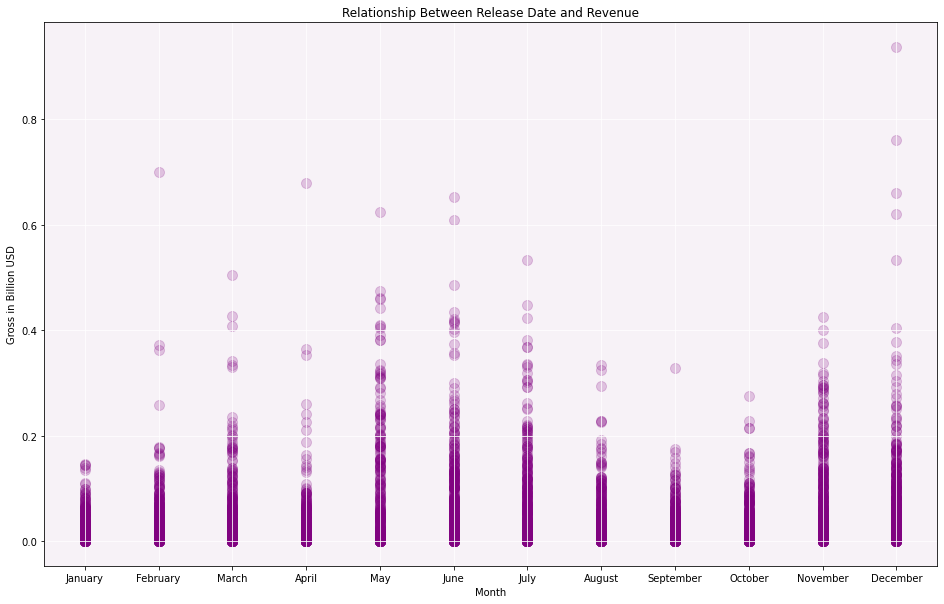

In [33]:
month_names = list(map(lambda x: calendar.month_name[x], range(1,13,1)))

plt.figure(figsize=(16,10))
ax = plt.axes()
plt.title('Relationship Between Release Date and Revenue')
plt.xlabel('Month')
plt.ylabel('Gross in Billion USD')
plt.scatter(dom_money['month'], (dom_money['dom_gross']/bil), s=100, color='purple', alpha=0.2)
ax.set_facecolor('thistle')
ax.patch.set_alpha(0.2)
ax.grid(color='white')
ax.set_xticks(ticks=range(1,13,1))
ax.set_xticklabels(month_names)
plt.show()

Above, we see the outlier markers for several of histories highest grossing films. As the markers drop lower towards average revenue, we can see an apparent 's' curve. There is a rolling increase at the begining of summer, May through July when it begins to tapper back down. Novemeber see a jump again, with December marking some of the most profitable movies of all time, with a high average value as well. These major ourliers are likely tugging December's average gross. Is it societal/seasonal to be more likely to atttend a movie during these times? Or are there typically certain kinds of movies released in these seasons that draw people to hte theater. Let's take a closer look at the performance based upon release date, and then zoom on genres at those times.

In [35]:
month_money_genres= pd.read_csv('./CleanData/clean_month_money_genres.csv')
month_money_genres.set_index('month', inplace=True)
month_money_genres

,avg_dom_gross_mil,avg_budget_mil,avg_dom_profit_mil,title_count,Action,Adventure,Animation,Biography,Comedy,Crime,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
month,,,,,,,,,,,,,,,,,,,,,
1,26.216143,22.393481,4.101723,317,53.0,23.0,8.0,11.0,47.0,31.0,...,30.0,5.0,1.0,18.0,17.0,13.0,2.0,48.0,2.0,2.0
2,38.455800,29.500362,8.745395,361,54.0,37.0,11.0,13.0,51.0,29.0,...,30.0,6.0,3.0,21.0,29.0,12.0,3.0,43.0,5.0,3.0
3,42.457385,45.100607,9.231083,427,61.0,49.0,13.0,20.0,72.0,29.0,...,29.0,5.0,6.0,20.0,42.0,20.0,5.0,47.0,6.0,3.0
4,29.331189,26.727983,4.291827,421,46.0,30.0,11.0,23.0,75.0,40.0,...,54.0,3.0,0.0,25.0,35.0,25.0,6.0,54.0,5.0,1.0
5,71.062998,46.603951,21.337619,381,55.0,46.0,8.0,7.0,70.0,22.0,...,20.0,2.0,2.0,9.0,32.0,20.0,3.0,34.0,2.0,0.0
6,70.070158,44.731459,24.615593,447,69.0,55.0,20.0,21.0,78.0,27.0,...,21.0,12.0,2.0,17.0,27.0,24.0,5.0,31.0,8.0,0.0
7,64.231580,38.128857,19.506446,416,59.0,48.0,13.0,8.0,85.0,21.0,...,25.0,5.0,3.0,19.0,26.0,24.0,5.0,36.0,0.0,2.0
8,34.165803,24.020525,7.545062,467,61.0,35.0,14.0,17.0,57.0,41.0,...,39.0,13.0,2.0,19.0,26.0,14.0,7.0,60.0,5.0,1.0
9,25.083284,23.802383,2.069804,455,70.0,26.0,10.0,23.0,64.0,45.0,...,50.0,6.0,1.0,27.0,38.0,19.0,10.0,70.0,2.0,3.0


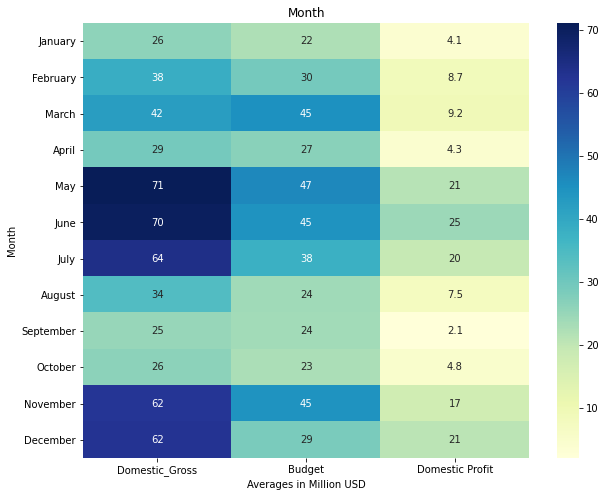

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(month_money_genres[['avg_dom_gross_mil', 'avg_budget_mil','avg_dom_profit_mil']], 
            xticklabels = ['Domestic_Gross', 'Budget', 'Domestic Profit'] , yticklabels = month_names, annot=True,
            cmap="YlGnBu"); 
plt.xlabel("Averages in Million USD")
plt.title("Month")
plt.ylabel("Month")
plt.show()

As with the scattter above, we see even more distinctly here (going by average per month) that May, June, and July have a sharp uptick in gross that drops off again in August. This is the typical summer break for students. It is worth investigating further if children's and teen's movies are popular at this time or if its adult movies. Kids have a lot of time on their hands in the summer. Winter shows a jump in gross for November and December.

Below, I averaged ROI to find the most profitable time time release a movie. Winter still has commendable average returns, however mid summer shows an almost double jump into potential returns. The kick off to summer offers a great potential for success.

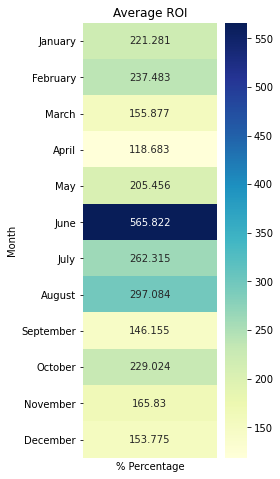

In [37]:
plt.figure(figsize=(3, 8))
sns.heatmap(roi_months, cmap="YlGnBu", annot=True, xticklabels=[], yticklabels = month_names, fmt='g');
plt.title("Average ROI")
plt.xlabel("% Percentage")
plt.ylabel("Month")
plt.show()

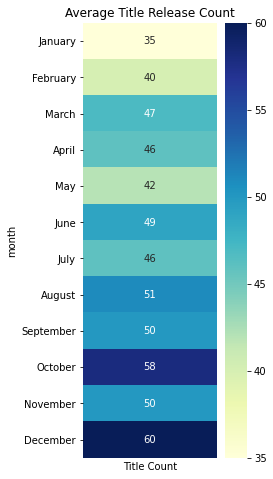

In [38]:
avg_titles = (month_money_genres['title_count']/9).astype(int).to_frame()
plt.figure(figsize=(3, 8))
sns.heatmap(avg_titles, cmap="YlGnBu", annot=True, xticklabels=[], yticklabels = month_names);
plt.title("Average Title Release Count")
plt.xlabel("Title Count")
plt.show()

Above I examine if the increase in revenue during those two time periods is related to increased volume of movies being released. Looking at averages, we see a steady increase from the start of the year until December, dropping again for the return to January. This is when there is most competition in terms of quantity at the box office. This competition is likely what is driving down the ROI for December.

Finally, let's see if the summer success correlate with any particular genre.

In [39]:
month_genres = month_money_genres.drop(['avg_dom_gross_mil', 'avg_budget_mil',
                                        'avg_dom_profit_mil', 'title_count'], axis=1)

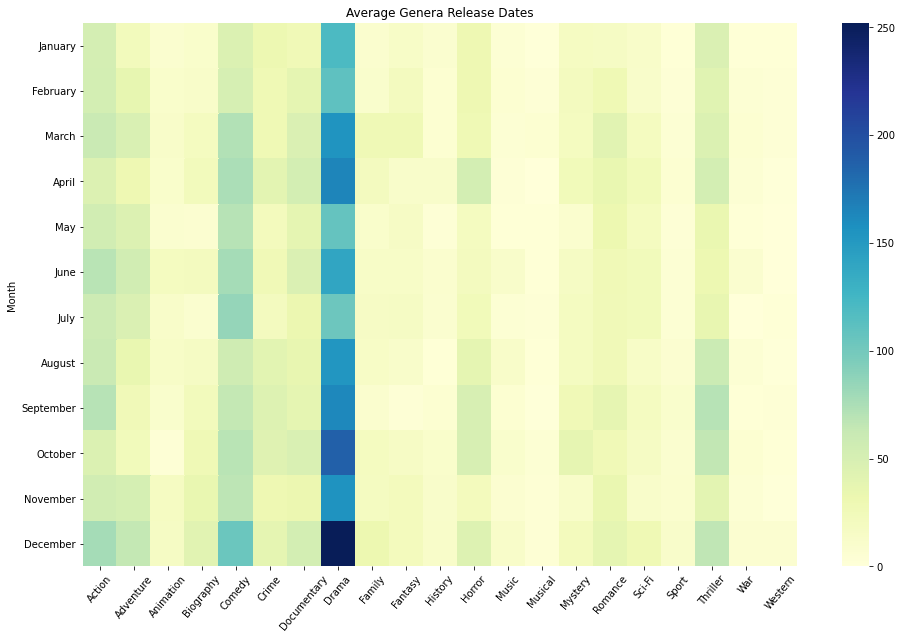

In [40]:
plt.figure(figsize=(16, 10))
sns.heatmap(month_genres, cmap="YlGnBu", yticklabels = month_names, fmt='g');
plt.title("Average Genera Release Dates")
plt.xticks(rotation=50)
plt.ylabel("Month")
plt.show()

The heatmap above shows that movies described as 'Dramas' are most frequent through out entire year, but receive a plot peek in the winter. Thriller and Horror show a slight uptick during spooky season. Comedy slightly follows the 's' curve of highest grossing times. Action and Adventure are stteady midrange released all year. Animation shows slight increase in heat during times students would be on spring break, summer break, or holiday break.

## Conclusion

#### 1) Who are the domestic leaders? 

The domestic industry leaders according to overall gross are Beuna Vista (Disney), Universal Studios, Warner Brothers, Fox.

#### 2) What are their production numbers?

They produce on average 10 - 20 movies per year.

#### 3) What types of movies are they making? 

The big four genres they produce are Action, Adventure, and Dramas, and Comedies.

#### 4) Is release datet correlated with a films success at the box office?

Yes. Movies released in June through August have a greater return on investment compared to other monthes.

## Insights and Recomendations

I reccomend the following considerations: Should Microsoft produce movies in the most popular categories that could be saturated by already popular and powerful companies? Does that risk giving people too many options at the box office where they might chose to go with the more familiar options. Should Microsoft consider finding a genre it can dominate? Should Microsoft stray from mainstream blockbusters entirely like IFC? Microsoft could use the insight regarding movie release relationship to ROI to decide a good time of year to debut content. Perhaps be splashy and enter the scene during a typically slow theater time to get noticed instead of being overshadowed by the summer and holiday blockbusters. Alternatively, more people are at the theater at those times and could become Microsoft viewers as well.
